In [1]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [2]:
df = pd.read_csv('csv/iPhoneTweets.csv')

In [3]:
df.head()

,id,date,time,tweet,language
0,1.44E+18,9/26/2021,10:23:04,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en
1,1.44E+18,9/26/2021,10:23:04,I kind of want the iPhone 13 🤔,en
2,1.44E+18,9/26/2021,10:22:51,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en
3,1.44E+18,9/26/2021,10:22:28,iphone 13 is another huge distraction from the...,en
4,1.44E+18,9/26/2021,10:22:09,@TrollTheMagic I know you are going to buy iPh...,en


In [4]:
df = df[df['language'] == "en"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65327 entries, 0 to 129333
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        65327 non-null  object
 1   date      65327 non-null  object
 2   time      65327 non-null  object
 3   tweet     65327 non-null  object
 4   language  65327 non-null  object
dtypes: object(5)
memory usage: 3.0+ MB


In [6]:
df.isna().sum()

id          0
date        0
time        0
tweet       0
language    0
dtype: int64

In [7]:
df['language'].value_counts()

en    65327
Name: language, dtype: int64

In [8]:
df['date_time'] = df['date'].str.cat(df['time'],sep=" ")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65327 entries, 0 to 129333
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         65327 non-null  object
 1   date       65327 non-null  object
 2   time       65327 non-null  object
 3   tweet      65327 non-null  object
 4   language   65327 non-null  object
 5   date_time  65327 non-null  object
dtypes: object(6)
memory usage: 3.5+ MB


In [10]:
df = df[['id', 'tweet', 'language', 'date_time']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65327 entries, 0 to 129333
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         65327 non-null  object
 1   tweet      65327 non-null  object
 2   language   65327 non-null  object
 3   date_time  65327 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [12]:
df.to_csv('csv/iPhoneTweets_en.csv', index=False)

In [13]:
tweets = pd.read_csv('csv/iPhoneTweets_en.csv')
tweets.head()

,id,tweet,language,date_time
0,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,9/26/2021 10:23:04
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,9/26/2021 10:23:04
2,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,9/26/2021 10:22:51
3,1.440000e+18,iphone 13 is another huge distraction from the...,en,9/26/2021 10:22:28
4,1.440000e+18,@TrollTheMagic I know you are going to buy iPh...,en,9/26/2021 10:22:09


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65327 entries, 0 to 65326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         65327 non-null  float64
 1   tweet      65327 non-null  object 
 2   language   65327 non-null  object 
 3   date_time  65327 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [15]:
tweets.date_time = pd.to_datetime(tweets.date_time)

In [16]:
tweets[tweets.duplicated()]

,id,tweet,language,date_time
48258,1.445960e+18,@flyingbeast320 Sir delhi me to iphone 13 mil ...,en,2021-10-06 23:59:55
48259,1.445960e+18,iphone 13 users better go to work tonight !!!,en,2021-10-06 23:59:53
48260,1.445960e+18,Win a New iPhone 13 https://t.co/m063Weot1V,en,2021-10-06 23:59:40
48261,1.445960e+18,Got myself the iPhone 13 Pro and HOLY SHIT THE...,en,2021-10-06 23:59:27
48262,1.445960e+18,@ATTexplore I've never had an iphone! Thanks f...,en,2021-10-06 23:59:10
...,...,...,...,...
57205,1.445960e+18,stop calling and ask for iPhone 13 stock please,en,2021-10-07 00:01:33
57206,1.445960e+18,iPhone 13 Pro &amp; Pro Max review: The ultima...,en,2021-10-07 00:00:50
57207,1.445960e+18,The IPhone 13 is 🔥🔥🔥🔥🔥,en,2021-10-07 00:00:33
57208,1.445960e+18,Get the new iPhone 13 from @plentygadgets iPh...,en,2021-10-07 00:00:07


In [17]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [18]:
clean_tweets(tweets)
tweets.head()

<ipython-input-17-200654f2ea1b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.clean_tweet[i] = clean_tokens


,id,tweet,language,date_time,clean_tweet
0,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,"[tg, iphone, giveaway]"
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,"[kind, want, iphone]"
2,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,"[tg, iphone, giveaway]"
3,1.440000e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,"[iphone, another, huge, distraction, enemy, be..."
4,1.440000e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,"[trollthemagic, know, going, buy, iphone, pro,..."


In [19]:
tweets.clean_tweet[4]

['trollthemagic', 'know', 'going', 'buy', 'iphone', 'pro', 'max']

In [20]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [21]:
lemmatize_tweet(tweets.clean_tweet)
tweets

<ipython-input-20-c831a146658a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet


,id,tweet,language,date_time,clean_tweet
0,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,tg iphone giveaway
1,1.440000e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,kind want iphone
2,1.440000e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,tg iphone giveaway
3,1.440000e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,iphone another huge distraction enemy well hum...
4,1.440000e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,trollthemagic know go buy iphone pro max
...,...,...,...,...,...
65322,1.447050e+18,"@mashoto_ It just doesn’t make sense, this is ...",en,2021-10-10 00:02:52,mashoto make sense people buy upgraded iphone
65323,1.447050e+18,The new #Apple #iPhone 13 Pro Max boasts three...,en,2021-10-10 00:02:12,new # apple # iphone pro max boast three sony ...
65324,1.447050e+18,Iphone 13 pro max .. White color 🤍🐻‍❄️ #LATOKE...,en,2021-10-10 00:01:15,iphone pro max white color # latokeniphone giv...
65325,1.447050e+18,Got the iPhone 13 today,en,2021-10-10 00:00:54,get iphone today


In [22]:
tweets.clean_tweet[4]

'trollthemagic know go buy iphone pro max'

Common Words

In [23]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

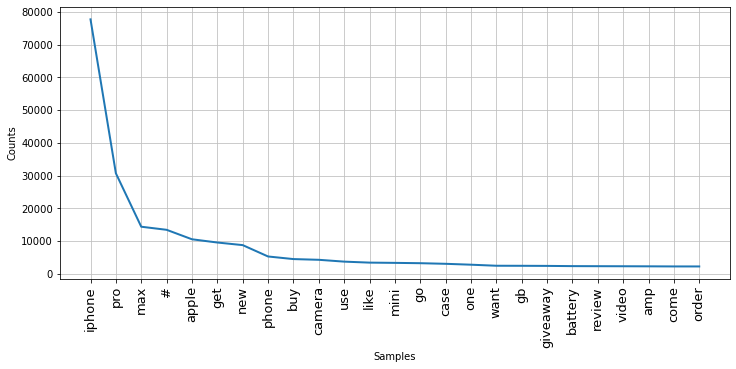

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

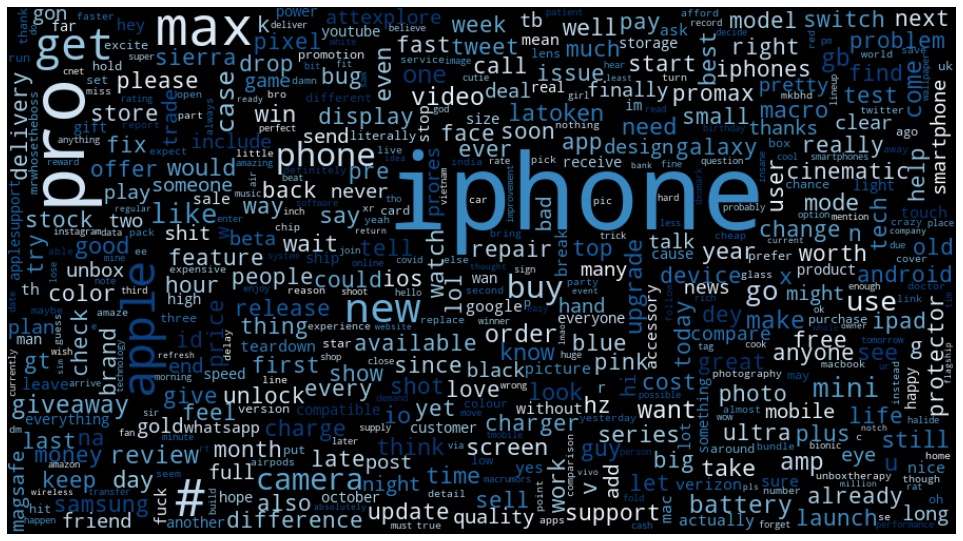

In [25]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Remove iphone, apple, q, and #

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('iphone',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('apple',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('q',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))

In [27]:
finish_cleaning(tweets)

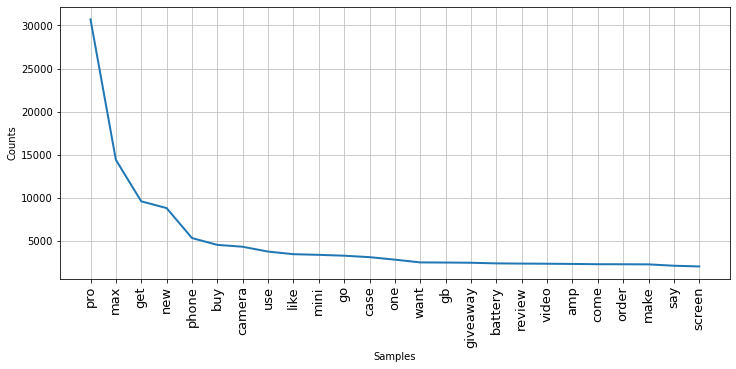

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

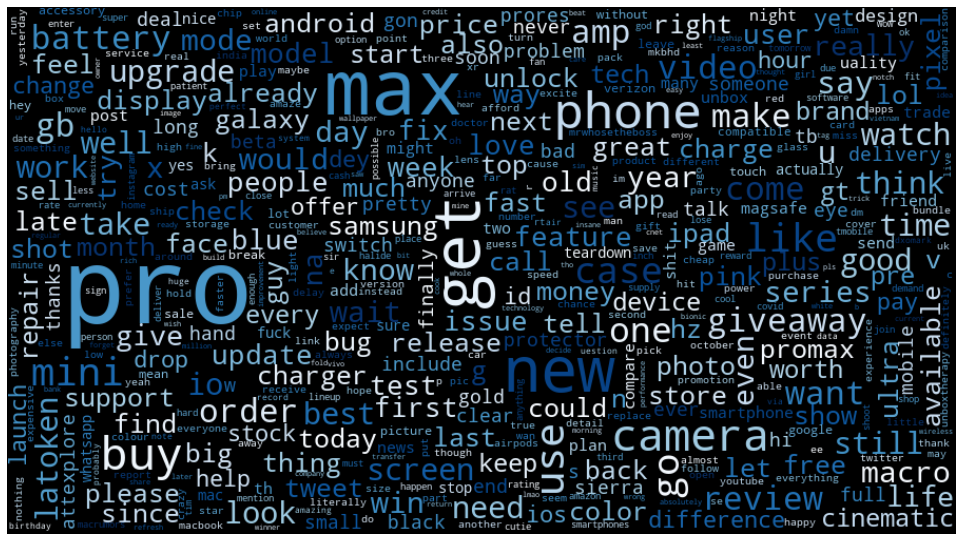

In [29]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Frequency In Dataframe

In [30]:
word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
18,pro,30708
19,max,14397
10,get,9576
104,new,8792
12,phone,5314
17,buy,4519
375,camera,4302
72,use,3741
44,like,3437
46,mini,3363


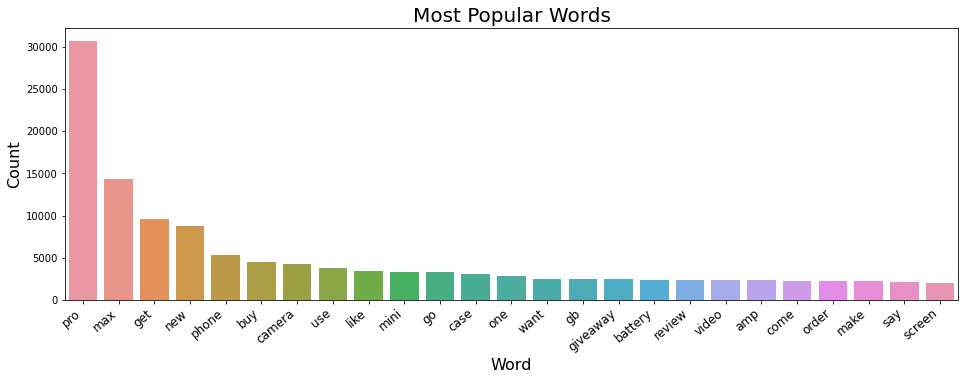

In [31]:
freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

Dataframe grouping the number of tweets by hour of the day

In [32]:
hour_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.hour)['clean_tweet'].count()).reset_index()
hour_df = hour_df.rename(columns={'date_time': 'Hour', 'clean_tweet': 'Count'})
hour_df.Hour = hour_df.Hour.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0], ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM', '12:00 AM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'])
hour_df

,Hour,Count
0,12:00 AM,2089
1,1:00 AM,2007
2,2:00 AM,2108
3,3:00 AM,2957
4,4:00 AM,2578
5,5:00 AM,2839
6,6:00 AM,2886
7,7:00 AM,3154
8,8:00 AM,3627
9,9:00 AM,3946


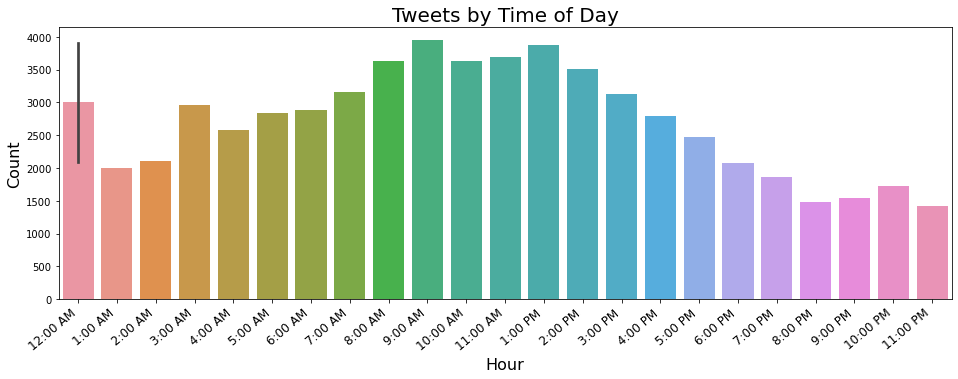

In [33]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hour_df, x= "Hour", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Hour', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweets by Time of Day", fontsize=20)
plt.show()

Dataframe grouping the number of tweets by day

In [34]:
weekday_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.weekday)['clean_tweet'].count()).reset_index()
weekday_df = weekday_df.rename(columns={'date_time': 'Day', 'clean_tweet': 'Count'})
weekday_df.Day = weekday_df.Day.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_df

,Day,Count
0,Monday,6764
1,Tuesday,11578
2,Wednesday,13502
3,Thursday,10575
4,Friday,8698
5,Saturday,6876
6,Sunday,7334


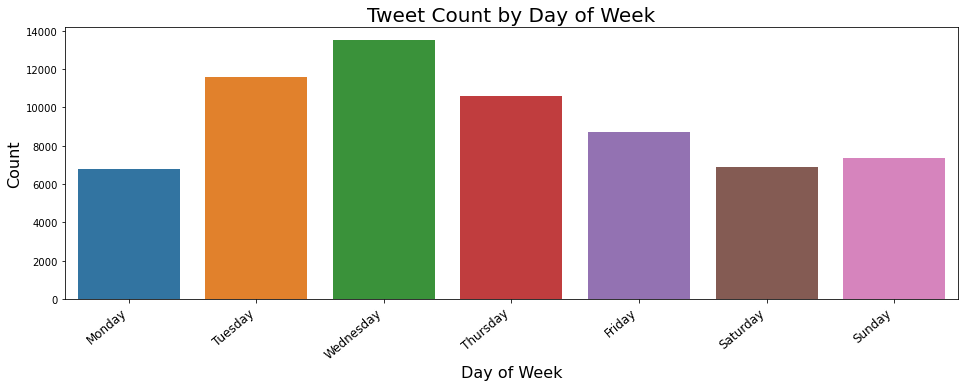

In [35]:
# Plot histogram of Tweet Counts by Day

plt.figure(figsize=(16,5))
ax = sns.barplot(data=weekday_df, x= "Day", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweet Count by Day of Week", fontsize=20)
plt.show()

Dataframe grouping the number of tweets by day of the year

In [36]:
day_df = pd.DataFrame(tweets.resample('D', on='date_time')['clean_tweet'].count()).reset_index().sort_values(by='clean_tweet', ascending=False)
day_df = day_df.rename(columns={'date_time': 'Day', 'clean_tweet': 'Count'})
day_df.head()

,Day,Count
10,2021-10-06,7490
9,2021-10-05,6874
3,2021-09-29,6012
4,2021-09-30,5366
5,2021-10-01,5223


In [37]:
top_tweeted_days = day_df.sort_values(by = 'Count', ascending=False)[:25]
top_tweeted_days

,Day,Count
10,2021-10-06,7490
9,2021-10-05,6874
3,2021-09-29,6012
4,2021-09-30,5366
5,2021-10-01,5223
11,2021-10-07,5209
2,2021-09-28,4704
8,2021-10-04,3972
6,2021-10-02,3783
12,2021-10-08,3475


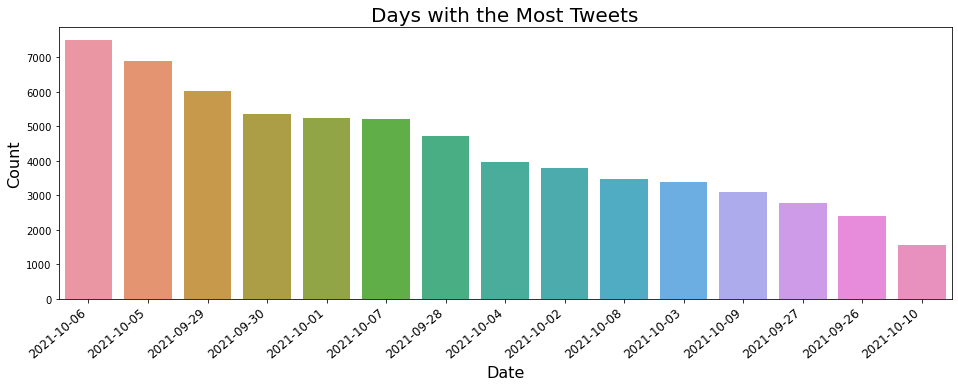

In [38]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_tweeted_days, x= top_tweeted_days.Day.dt.date, y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Days with the Most Tweets", fontsize=20)
plt.show()

In [39]:
tweets.to_csv('csv/cleaned_tweets.csv', header=True)